![](https://ars.els-cdn.com/content/image/1-s2.0-S1574954119300895-gr1_lrg.jpg)

# Overview

With the effects of climate change impacting the globe now more than ever, it is critical to maintain healthy natural areas as much as possible. Human activity has a large impact on environmental health, and tracking that impact is critical. Activities like logging, mining, and agriculture can destroy the functioning of natural areas.  In each ecosystem, there are plants and animals that have an outsized impact on the healthy balance found in the region. These keystone species are critical to the survival of many other species in the region. Performing an accurate account of the species present can give insight into the health of a given area, and can help pinpoint areas that are in special need of immediate restoration efforts. 

For an in depth look into the original research, please reference the paper found [here.](https://www.sciencedirect.com/science/article/abs/pii/S1574954119300895?via%3Dihub)

# Business Understanding

![](https://live.staticflickr.com/2251/5758564003_70a47ae0eb.jpg)

[](https://live.staticflickr.com/5181/5758564919_8fb1db830e_b.jpg)

The Mexican Government has partnered with the VIGIA project, which aims to create an autonomous surveillance system for monitoring the ecological health of protected natural areas. The first step in this project is to use drone footage to identify critical, or keystone species in the images. The initial images are from the Tehuacán-Cuicatlán Valley, a semi-arid zone in southern Mexico. This area was chosen because of its wide biodiversity and the importance that the ecology plays in the health of the region. It became a UNESCO World Heritage Site in 2018 in an effort to protect the area. Despite this protection, human activity is still impacting the health of the region. 

## Ecological Understanding

Our work focuses on columnar cactus recognition as they are a keystone species in the region. A keystone species is defined as an organism that helps to hold the system together. Without this species, the ecosystem would look different and its functions would shift dramatically. Some ecosystems may not be able to adapt to environmental changes if the keystone species disappears. With the backbone of the area gone, there is room for invasive species to take over and dramatically shift the ecosystem in an unhealthy direction. 

In the Tehuacán-Cuicatlán Valley, some of the richest biodiversity in North America is found. Due to the nearby mountains, the valley only receives annual precipitations of 400 to 800mm. A central feature in this diverse region is the columnar cactus. It provides essential habitat for many species of animals. The columnar cactus also functions to reduce erosion in the area and helps to maintain vital water in the landscape. As the cactus disappears, many other species of birds, lizards, mammals, and insects lose their habitat and food and water source. Research has also found the columnar cactus provides important features in the landscape that provides ideal germination grounds for many other species of plants endemic to the region.

Human activity has reduced the healthy land in the valley by 14.69 percent since the year 2000. Agricultural activities, along with mining and deforestation are impacting the health of the region. Because of the large size of the site, it is nearly impossible to monitor the entire area, leaving many remote spaces vulnerable to degradation.

For many years, aerial vehicles like small airplanes and helicopters have been used to monitor large natural areas. The cost for using these vehicles is high, which limits the frequency of use. As drones have become easier to access and cheap to use, they can be applied to unique problems like natural ecosystem monitoring. They can be used for frequently, allowing for more images to be collected and processed for a deeper understanding of the region.


# False Negatives and Positives 

In our model, we will be assessing if an image has a columnar cactus present or not. A false negative is an image that has a cactus present, but is incorrectly labeled as not holding a cactus. A false positive is an image that is predicted to have a cactus present when it does not.

Care must be taken to ensure that images labeled as having cactus present are accurate. While it would cause a waste of labor to move to intervene in an area that was incorrectly marked as not having cacti, it would be more problematic to miss degraded areas with no cactus all together. This would mean areas that are in need of restoration would go unnoticed.

In [1]:
#Import Relevant Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Input, LSTM, AveragePooling2D
from keras.datasets import mnist
from keras import regularizers, initializers, optimizers
import os
import datetime
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import plot_confusion_matrix
from pathlib import Path
import matplotlib.image as mpimg
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
import seaborn as sns
import gc
from timeit import default_timer as timer
import tensorflow as tf
pd.set_option('display.float_format', lambda x: '%.1f' % x)
os.environ['KMP_DUPLICATE_LIB_OK']='True' #This prevents kernel shut down due to xgboost conflict
from tensorflow.keras.preprocessing import image
import zipfile
import random
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization, Reshape, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import pydot
import graphviz
from tensorflow.keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

#Take a look at the available data
print(os.listdir("../input/aerial-cactus-identification/"))

['sample_submission.csv', 'train.zip', 'test.zip', 'train.csv']


In [2]:

def plot_performance(hist,model):
    """ Returns 5 pairs of plots comparing Training and Validation data. 
    The first column is autoscaled. The second column has a set scale.
    First pair of plots returns training and validation accuracy. 
    Second pair of plots returns training and validation loss. 
    Third pair of plots returns training and validation F1-Scores. 
    Fourth pair of plots returns training and validation recall scores. 
    Fifth pair of plots returns training and validation precision scores.
    
    hist: input history model containing train images, labels, and validation data. """
    
    hist_ = hist.history
    epochs = hist.epoch
    recall = np.array(hist_['recall'])
    precision = np.array(hist_['precision'])
    val_recall = np.array(hist_['val_recall'])
    val_precision = np.array(hist_['val_precision'])
    
    #
    figure,axis = plt.subplots(5,2, figsize = (30,30))
    #Accuracy plots
    axis[0,0].plot(epochs, hist_['accuracy'], label='Training Accuracy', color = 'xkcd:plum')
    axis[0,0].plot(epochs, hist_['val_accuracy'], label='Validation Accuracy', color = 'xkcd:aqua')
    axis[0,0].set_xlabel('Epochs')
    axis[0,0].set_ylabel('Score')
    axis[0,0].set_title('Training and validation accuracy')
    axis[0,0].legend()
    
    
    axis[0,1].plot(epochs, hist_['accuracy'], label='Training Accuracy', color = 'xkcd:plum')
    axis[0,1].plot(epochs, hist_['val_accuracy'], label='Validation Accuracy', color = 'xkcd:aqua')
    axis[0,1].set_ylim(0,1)
    axis[0,1].set_xlabel('Epochs')
    axis[0,1].set_ylabel('Score')
    axis[0,1].set_title('Training and validation accuracy')
    axis[0,1].legend()
    
    
    #--------------------------------------------------------------------
    #Loss
    axis[1,0].plot(epochs, hist_['loss'], label='Training loss', color = 'xkcd:plum')
    axis[1,0].plot(epochs, hist_['val_loss'], label='Validation loss', color = 'xkcd:aqua')
    axis[1,0].set_xlabel('Epochs')
    axis[1,0].set_ylabel('Score')
    axis[1,0].set_title('Training and validation loss')
    axis[1,0].legend()
    
    
    axis[1,1].plot(epochs, hist_['loss'], label='Training loss', color = 'xkcd:plum')
    axis[1,1].plot(epochs, hist_['val_loss'], label='Validation loss', color = 'xkcd:aqua')
    axis[1,1].set_xlabel('Epochs')
    axis[1,1].set_ylabel('Score')
    axis[1,1].set_ylim(0,1)
    axis[1,1].set_title('Training and validation loss')
    axis[1,1].legend()
    
    #-------------------------------------------------------------------
    #F1 Scores
    axis[2,0].plot(epochs, 
             2*((recall * precision)/(recall + precision)), 
             label='Training f1', color = 'xkcd:plum')
    axis[2,0].plot(epochs, 
             2*((val_recall * val_precision)/(val_recall + val_precision)), 
             label='Validation f1', color = 'xkcd:aqua')
    axis[2,0].set_xlabel('Epochs')
    axis[2,0].set_ylabel('Score')
    axis[2,0].set_title('Training and validation F1-Score')
    axis[2,0].legend()
    
    
    axis[2,1].plot(epochs, 
             2*((recall * precision)/(recall + precision)), 
             label='Training f1', color = 'xkcd:plum')
    axis[2,1].plot(epochs, 
             2*((val_recall * val_precision)/(val_recall + val_precision)), 
             label='Validation f1', color = 'xkcd:aqua')
    axis[2,1].set_xlabel('Epochs')
    axis[2,1].set_ylabel('Score')
    axis[2,1].set_ylim(0,1)
    axis[2,1].set_title('Training and validation F1-Score')
    axis[2,1].legend()
    
    #-------------------------------------------------------------------------
    #Recall
    
    
    axis[3,0].plot(epochs, recall, label = "Training Recall", color = 'xkcd:plum')
    axis[3,0].plot(epochs, val_recall, label = "Validation Recall", color = 'xkcd:aqua')
    axis[3,0].set_xlabel('Epochs')
    axis[3,0].set_ylabel('Score')
    axis[3,0].set_title("Training and Validation Recall Scores")
    axis[3,0].legend()
    
    
    axis[3,1].plot(epochs, recall, label = "Training Recall", color = 'xkcd:plum')
    axis[3,1].plot(epochs, val_recall, label = "Validation Recall", color = 'xkcd:aqua')
    axis[3,1].set_ylim(0,1)
    axis[3,1].set_xlabel('Epochs')
    axis[3,1].set_ylabel('Score')
    axis[3,1].set_title("Training and Validation Recall Scores")
    axis[3,1].legend()
    
    #------------------------------------------------------------------------
    #Precision
    axis[4,0].plot(epochs, precision, label = "Training Precision", color = 'xkcd:plum')
    axis[4,0].plot(epochs, val_precision, label = "Validation Precision", color = 'xkcd:aqua')
    axis[4,0].set_xlabel('Epochs')
    axis[4,0].set_ylabel('Score') 
    axis[4,0].set_title("Training and Validation Precision Scores")
    axis[4,0].legend()
    
    
    
    axis[4,1].plot(epochs, precision, label = "Training Precision", color = 'xkcd:plum')
    axis[4,1].plot(epochs, val_precision, label = "Validation Precision", color = 'xkcd:aqua')
    axis[4,1].set_xlabel('Epochs')
    axis[4,1].set_ylabel('Score')
    axis[4,1].set_ylim(0,1)
    axis[4,1].set_title("Training and Validation Precision Scores")
    axis[4,1].legend()
    
    
    plt.show()
    
    score = model.evaluate(val_generator, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("Test recall:", score[2])
    print("Test precision:", score[3])

# Data Understanding

The original data found in this notebook was generated by the research team, VIGIA. VIGIA stands for Vigilancia Autónoma de Reservas de la Biósfera, or Autonomous Surveillance of Biosphere Reserves. Using drone footage, the team collected over 17,000 images of a 10,000 square km area of the Tehuacán-Cuicatlán Valley in Southern Mexico. The images were taken by a DJI Phantom 3 Advanced drone flying at 100m. The images were manually identified and marked by the research team in partnership with the Mexican Government.  The goal of the project was to use drone footage to assist in the ecosystem monotoring necessary for sensitive environmental areas.

The dataset conatins a collection of 32 x 32 thumbnail images. The images used in thie notebook were resized but the original images can be found [here.](https://www.kaggle.com/irvingvasquez/cactus-aerial-photos) The original images were pulled at 5s intervals using a camera with a resolution of 2704 X 1520 pixels. The patches with cacti were isolated and saved in a 32 X 32 pixel format. 



First, we exract our images from their zip files, and save them to a temporary directory for ease of working. We then can take a look at how many images are present in both our train and test files. 

In [3]:
# Extract images from zip files

with zipfile.ZipFile("../input/aerial-cactus-identification/train.zip","r") as z:
    z.extractall("/kaggle/temp/")
with zipfile.ZipFile("../input/aerial-cactus-identification/test.zip","r") as z:
    z.extractall("/kaggle/temp/test/") # needs to be in subdirectory (i.e. test/test/) for flow_from_directory to work


#Looking at the number of images in our train and test files
print(len(os.listdir("../temp/train")))
print(len(os.listdir("../temp/test/test")))

17500
4000


In [4]:
#Setting up our working directories
train_dir = "../temp/train"
#The test directory is reserved for the final competition submission
test_dir = "../temp/test"
labels = pd.read_csv('../input/aerial-cactus-identification/train.csv')


# Image Analysis Overview

We can see from the count, and visualized in the graph below, the classes are very imbalanced. There are three times as many cacti images as there are no cacti images. We will later address this imbalance by augmenting the photos.

In [5]:
#Taking a look at the class balance 
labels.has_cactus = labels.has_cactus.astype(str)
print(labels['has_cactus'].value_counts())

1    13136
0     4364
Name: has_cactus, dtype: int64


<AxesSubplot:xlabel='has_cactus', ylabel='Count'>

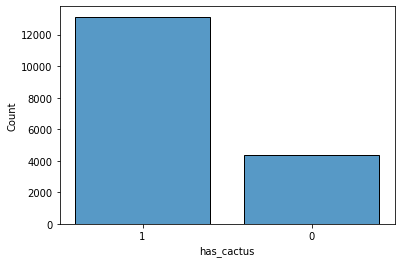

In [6]:
#Creating a simple plot of the data to show imabalance
sns.histplot(data = labels['has_cactus'], shrink = .8)

A random sample of the images can give us insight into the quality of the images.  We can see that the images are not of the highest resolution which is to be expected from images taken from 100m, but the cacti are distinct. Because we are working with drone footage, the cacti will be represented in many different orientations. We can use this aspect of drone footage to our advantage later when augmenting the photos. We do not have to be concerned with the directions of the photos so we will be able to flip them in different directions which can help strengthen our model.

This segment of code was sourced from this [kaggle user](https://www.kaggle.com/jacobmorrison213/simple-cnn-using-keras) to look through a random set of images. 

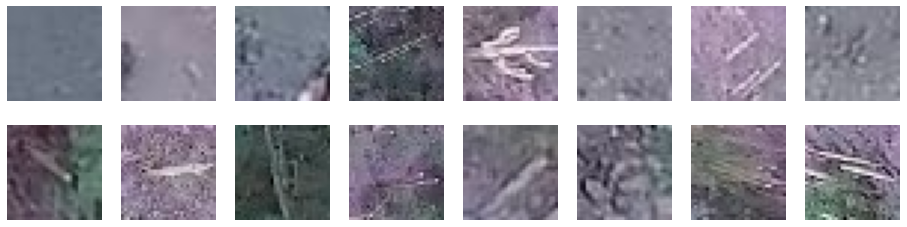

In [7]:
# Plot random sample of training images

rand_images = random.sample(os.listdir(train_dir), 16)

fig = plt.figure(figsize=(16,4))
for i, im in enumerate(rand_images):
    plt.subplot(2, 8, i+1)
    im = cv2.imread(os.path.join(train_dir, im))
    plt.imshow(im)
    plt.axis('off')
plt.show()

In [8]:
#Creating a sample split to look at example images with their corresponding labels.
ex_split = 0.8
index = np.random.permutation(range(len(labels))) < ex_split*len(labels)

ex_labels = labels[index]


In [9]:
ex_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, vertical_flip=True)

batch_size = 128

ex_generator = ex_datagen.flow_from_dataframe(ex_labels,directory=train_dir,x_col='id',
                                                    y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                                    target_size=(32,32))

Found 14000 validated image filenames belonging to 2 classes.


In [10]:
ex_images, ex_labels = next(ex_generator)

In the images below, we can see an example of both an image with a cactus present, and an image with no cactus present.

0.0


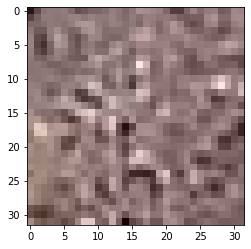

In [11]:
plt.imshow(array_to_img(ex_images[0]))
print(ex_labels[0])

1.0


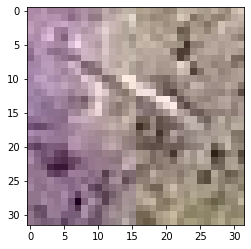

In [12]:
plt.imshow(array_to_img(ex_images[3]))
print(ex_labels[3])

## Performing a Train Test Split

Here we split our data into our training set and our validation set. 80% of the images are going into the training set with the remaining images being used to validate our models performance.

In [13]:
#Splits the data randomly
val_split = 0.8
index = np.random.permutation(range(len(labels))) < val_split*len(labels)

train_labels = labels[index]
val_labels = labels[~index]
print(len(train_labels), len(val_labels))

14000 3500


## Image Data Pre-Processing

We want to start pre-processing our images before putting them through the models. Our pre-processing will ensure all images are the same size and are scaled down to relieve any computational pressure. In the initial image data generator, we flip our images horizontally and vertically to give our model more images from which to train. We then use flow from dataframe to utilize the augmentation from our image data generator.

As we set up our train and validation generators, we have to make sure to specify our batch size and target size. It is important as well to indicate that we are working on a binary classification problem by setting class_mode to 'binary'.

In [14]:
# Process image JPEGs into tensors
# Pixel values rescaled from [0,255] to [0,1]

# Generate batches of tensor image data (with real-time data augmentation - horizontal and vertical flips)
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255, horizontal_flip=True, vertical_flip=True)

batch_size = 128

train_generator = train_datagen.flow_from_dataframe(train_labels,directory=train_dir,x_col='id',
                                                    y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                                    target_size=(32,32))

val_generator = train_datagen.flow_from_dataframe(val_labels,directory=train_dir,x_col='id',
                                                    y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                                    target_size=(32,32))

test_generator = train_datagen.flow_from_dataframe(val_labels,directory=train_dir,x_col='id',
                                                    y_col='has_cactus',class_mode='binary',batch_size=batch_size,
                                                    target_size=(32,32))

Found 14000 validated image filenames belonging to 2 classes.
Found 3500 validated image filenames belonging to 2 classes.
Found 3500 validated image filenames belonging to 2 classes.


We can now set our input shape that will be refelective of the target_size given above, and also the number of layers found in our images. Because we are working with RGB images, our layers are set to 3.

In [15]:
#setting input shape to be used in all models
input_shape = (32,32,3)

# Model 1: Simple Baseline Model


In the first model, we would like to start simply to see what kind of results we can get with a little complication as possible. 

We start with an input layer to establish the structure of the incoming data. We then include a flattening layer to set our images into one long array. Two simple dense layers are then added which funnel the information down. The first dense layer uses a relu activation function. Our final dense layer uses a sigmoid activation function because we are working on a binary classification problem.

In [16]:
#First simple model
model_start = Sequential(
    [
        Input(input_shape),
        Flatten(), # need to flatten our images to be one long array
        Dense(64,activation="relu"),
        Dense(1, activation="sigmoid"),  
        
    ])

model_start.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                196672    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 196,737
Trainable params: 196,737
Non-trainable params: 0
_________________________________________________________________



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

We now compile our model using binary crossentropy to evaluate our loss. We also use adam as our optimizer and evaluate using the accuracy, recall and precision metrics.. 

In [17]:
model_start.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy', 'Recall', 'Precision'])

We now can move to fitting our baseline model. We will set the number of epochs to 20 to get a quick understanding of our models performance. 

In [18]:
history = model_start.fit(train_generator, 
                     batch_size=batch_size,
                     epochs=20, 
                     validation_data=val_generator,
                     verbose = 2    
                         )

2021-12-16 23:02:43.048313: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
110/110 - 7s - loss: 0.6091 - accuracy: 0.7462 - recall: 0.9904 - precision: 0.7510 - val_loss: 0.5640 - val_accuracy: 0.7489 - val_recall: 1.0000 - val_precision: 0.7489
Epoch 2/20
110/110 - 5s - loss: 0.5476 - accuracy: 0.7511 - recall: 1.0000 - precision: 0.7511 - val_loss: 0.5325 - val_accuracy: 0.7489 - val_recall: 1.0000 - val_precision: 0.7489
Epoch 3/20
110/110 - 5s - loss: 0.5094 - accuracy: 0.7511 - recall: 1.0000 - precision: 0.7511 - val_loss: 0.4936 - val_accuracy: 0.7489 - val_recall: 1.0000 - val_precision: 0.7489
Epoch 4/20
110/110 - 5s - loss: 0.4700 - accuracy: 0.7511 - recall: 1.0000 - precision: 0.7511 - val_loss: 0.4520 - val_accuracy: 0.7489 - val_recall: 1.0000 - val_precision: 0.7489
Epoch 5/20
110/110 - 5s - loss: 0.4366 - accuracy: 0.7511 - recall: 1.0000 - precision: 0.7511 - val_loss: 0.4278 - val_accuracy: 0.7489 - val_recall: 1.0000 - val_precision: 0.7489
Epoch 6/20
110/110 - 5s - loss: 0.4191 - accuracy: 0.7511 - recall: 1.0000 - precision: 0.

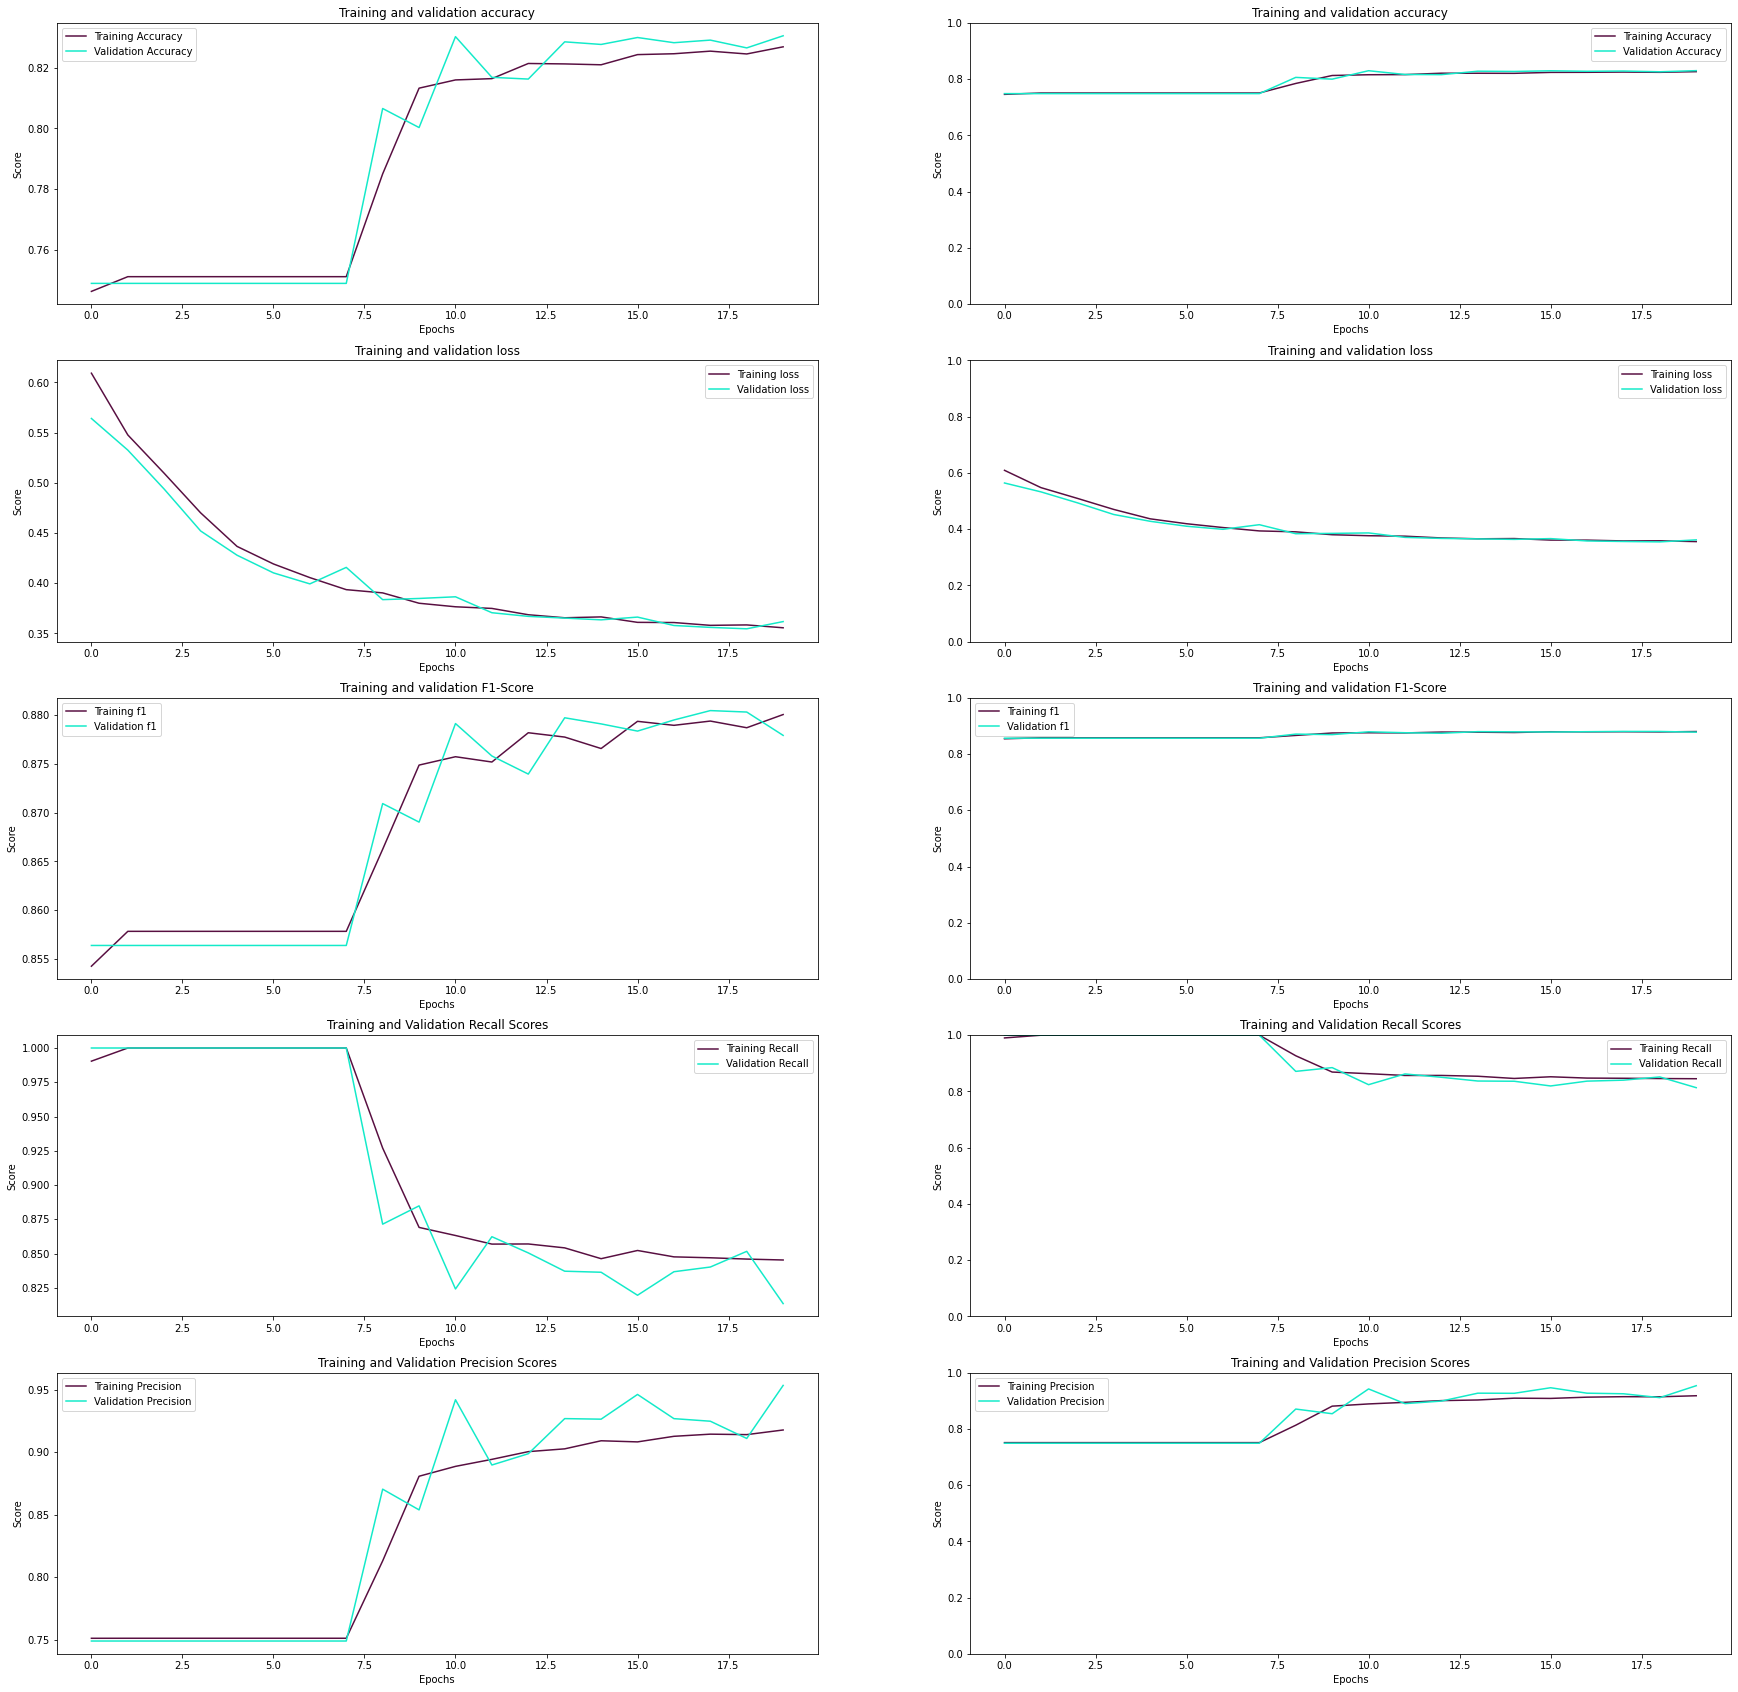

Test loss: 0.3620353937149048
Test accuracy: 0.8317142724990845
Test recall: 0.8130484819412231
Test precision: 0.9556053876876831


In [19]:
plot_performance(history, model_start)

## Model Evaluation

Our first simple model has an overall test accuracy of 88.97%. Our test recall is 92.64%. Most importantly, our precision is 92.71%. This is a great start for our modeling. Precision is our most important metric because it is evaluating how often an image is accurately reporting that cacti are present. We need to be able to trust this metric because a mislabeling of a land as having cacti will lead to the land getting ignored. 

# Model Iterations

In model two, we wanted to play around with diferent types of layers to see their effects.

Our first layer is a Conv2D layer using the relu activation function. Relu is useful over tanh and sigmoid in the topmost layers because it makes the model easier to train and often the model achieves better performance. Setting 'same' to padding extends the area in which CNN processes an image. We also make sure to set our input shape. Our initial filter is set in this layer which determines the number of filters from which the CNN will learn.

We then include a MaxPooling2D layer. This operation is putting a 2D filter over each channel and summarising the features covered by the filter. This is performing downsampling on our photos, specifically on the height and width of the spatial dimensions.

We then flatten our matrix down to a single long array before putting it through two more Dense layers.

In compiling our model we are using an adam optimizer with a set learning rate of .01. Additionally, we have put in an early stop in this model. Early stop will make sure to stop the model learning at a point where it seems there are no more improvements to be made on model function.

We are giving the next models more epochs to run through to evaluate performance over more iterations. We can set the epoch to a high number, and trust that the early stop will end the model training when no improvements are being made. 

## Model 2: Adding Convolutional Layers and MaxPooling

In [20]:
model2 = Sequential([

        Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation = 'relu'),
        Dense(1, activation='sigmoid')

]
)
opt = keras.optimizers.Adam(learning_rate=0.01)

# compiling models
model2.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy', 'Recall', 'Precision'])

# early stopping
cp = EarlyStopping(patience = 20, restore_best_weights=True)

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 1,049,729
Trainable params: 1,049,729
Non-trainable params: 0
_________________________________________________________________


In [21]:
start = timer()

history2 = model2.fit(train_generator,
                    batch_size = batch_size,
                    epochs=50, 
                    validation_data = val_generator,
                    callbacks = [cp],
                    verbose = 2
                  
                   )
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/50
110/110 - 9s - loss: 0.5137 - accuracy: 0.8211 - recall: 0.9532 - precision: 0.8328 - val_loss: 0.1965 - val_accuracy: 0.9217 - val_recall: 0.9302 - val_precision: 0.9640
Epoch 2/50
110/110 - 7s - loss: 0.1911 - accuracy: 0.9272 - recall: 0.9505 - precision: 0.9524 - val_loss: 0.3810 - val_accuracy: 0.8717 - val_recall: 0.9966 - val_precision: 0.8558
Epoch 3/50
110/110 - 7s - loss: 0.1847 - accuracy: 0.9300 - recall: 0.9515 - precision: 0.9551 - val_loss: 0.1526 - val_accuracy: 0.9440 - val_recall: 0.9641 - val_precision: 0.9612
Epoch 4/50
110/110 - 7s - loss: 0.1665 - accuracy: 0.9365 - recall: 0.9550 - precision: 0.9602 - val_loss: 0.1522 - val_accuracy: 0.9457 - val_recall: 0.9638 - val_precision: 0.9638
Epoch 5/50
110/110 - 7s - loss: 0.1533 - accuracy: 0.9395 - recall: 0.9588 - precision: 0.9606 - val_loss: 0.1414 - val_accuracy: 0.9469 - val_recall: 0.9596 - val_precision: 0.9692
Epoch 6/50
110/110 - 7s - loss: 0.1584 - accuracy: 0.9391 - recall: 0.9559 - precision: 0.

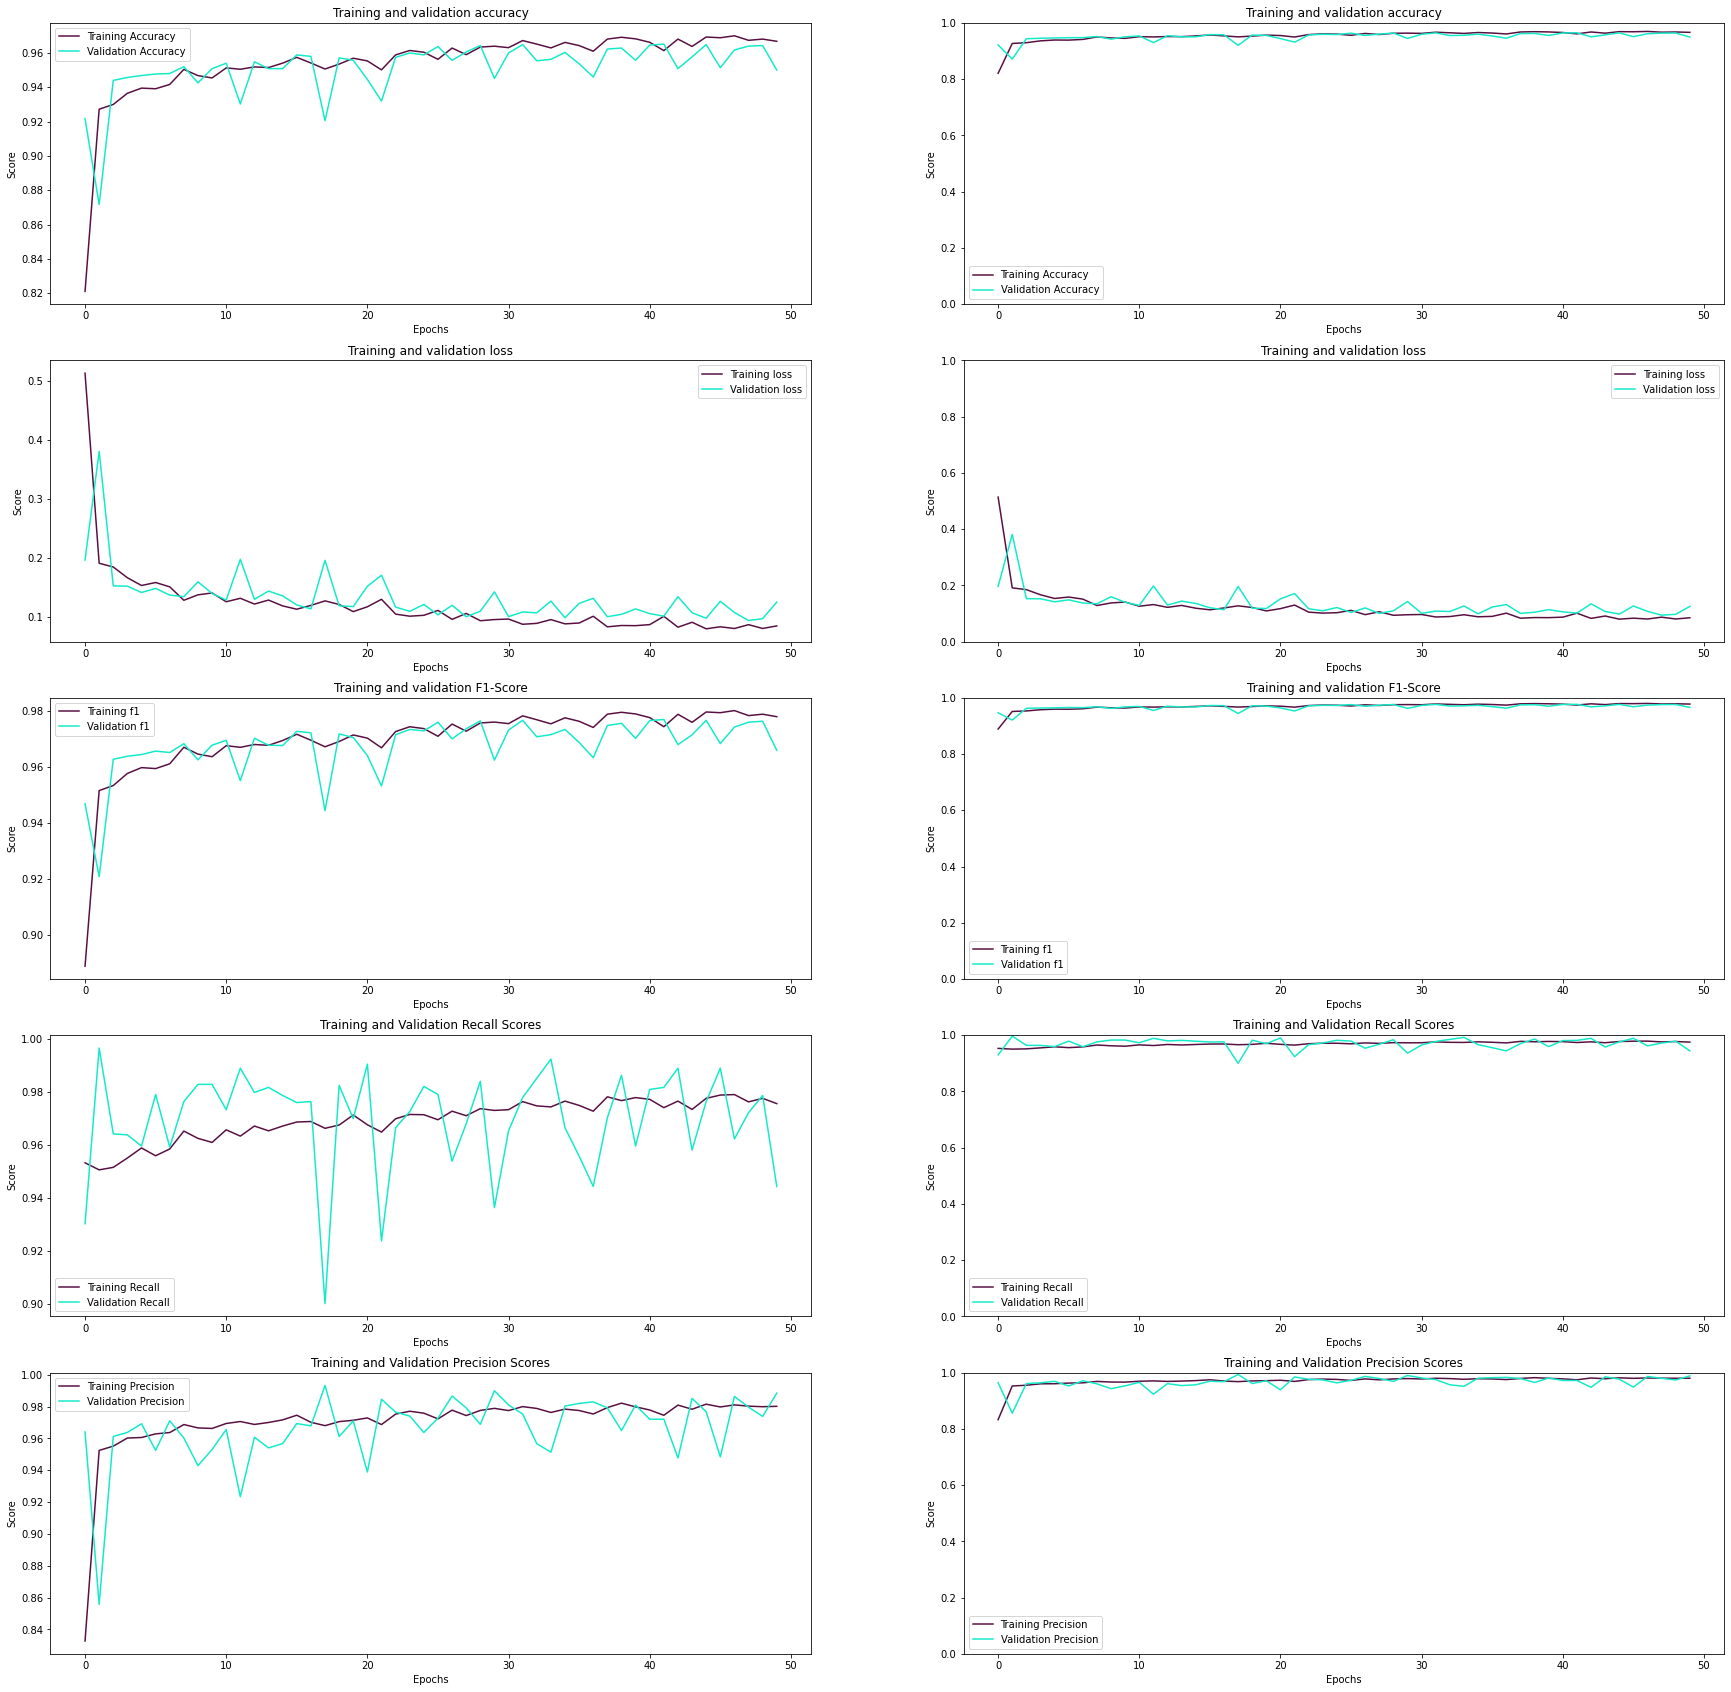

Test loss: 0.12575773894786835
Test accuracy: 0.9511428475379944
Test recall: 0.9442960619926453
Test precision: 0.9900000095367432


In [22]:
plot_performance(history2, model2)

## Model 2 Evaluation 

Model 2 has an overall test accuracy of 97.57%. Our test recall is 98.75%. Most importantly, our precision is 98.04%. This is a massive improvement on our first model but we are seeing the recall scores jump all over the place between 91% and 98%. This could be a sign we need to let our models train for longer so in future iterations we will increase the number of epochs to 100. 

## Model 3: Learning Rate Reductions and Early Stopping

In model 3, we are keeping the same layers for a our model, but we are making some changes to the early stopping and adding in a feature that allows the learning rate to gradually adjust as needed. We are also going to allow the model to train for 100 epochs. 

The documentation informing the use of the learning rate reduction class can be found [here.](https://keras.io/api/callbacks/reduce_lr_on_plateau/)

In [23]:
model3 = Sequential([

        Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = input_shape),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation = 'relu'),
        Dense(1, activation='sigmoid')

]
)

model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               1048704   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,049,729
Trainable params: 1,049,729
Non-trainable params: 0
_________________________________________________________________


In [24]:
model3.compile(loss = keras.losses.binary_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy', 'Recall', 'Precision'])
#Very cool early stopping and learning rate work
cp = [EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True), # Stop training when a monitored metric has stopped improving
             ReduceLROnPlateau(patience=10, verbose=1), # Reduce learning rate when a metric has stopped improving

            ]

In [25]:
history3 = model3.fit(train_generator,
                    epochs = 100,
                    verbose = 1,
                    callbacks = cp,
                    validation_data = val_generator,
                    
                   )

Epoch 1/100
110/110 [==============================] - 9s 72ms/step - loss: 0.3027 - accuracy: 0.8703 - recall: 0.9723 - precision: 0.8702 - val_loss: 0.2871 - val_accuracy: 0.8774 - val_recall: 0.9977 - val_precision: 0.8608
Epoch 2/100
110/110 [==============================] - 7s 65ms/step - loss: 0.1362 - accuracy: 0.9500 - recall: 0.9685 - precision: 0.9650 - val_loss: 0.1271 - val_accuracy: 0.9531 - val_recall: 0.9554 - val_precision: 0.9816
Epoch 3/100
110/110 [==============================] - 7s 66ms/step - loss: 0.1116 - accuracy: 0.9583 - recall: 0.9731 - precision: 0.9714 - val_loss: 0.1082 - val_accuracy: 0.9594 - val_recall: 0.9653 - val_precision: 0.9802
Epoch 4/100
110/110 [==============================] - 7s 66ms/step - loss: 0.1042 - accuracy: 0.9607 - recall: 0.9753 - precision: 0.9725 - val_loss: 0.0987 - val_accuracy: 0.9640 - val_recall: 0.9832 - val_precision: 0.9692
Epoch 5/100
110/110 [==============================] - 8s 69ms/step - loss: 0.1085 - accuracy: 0

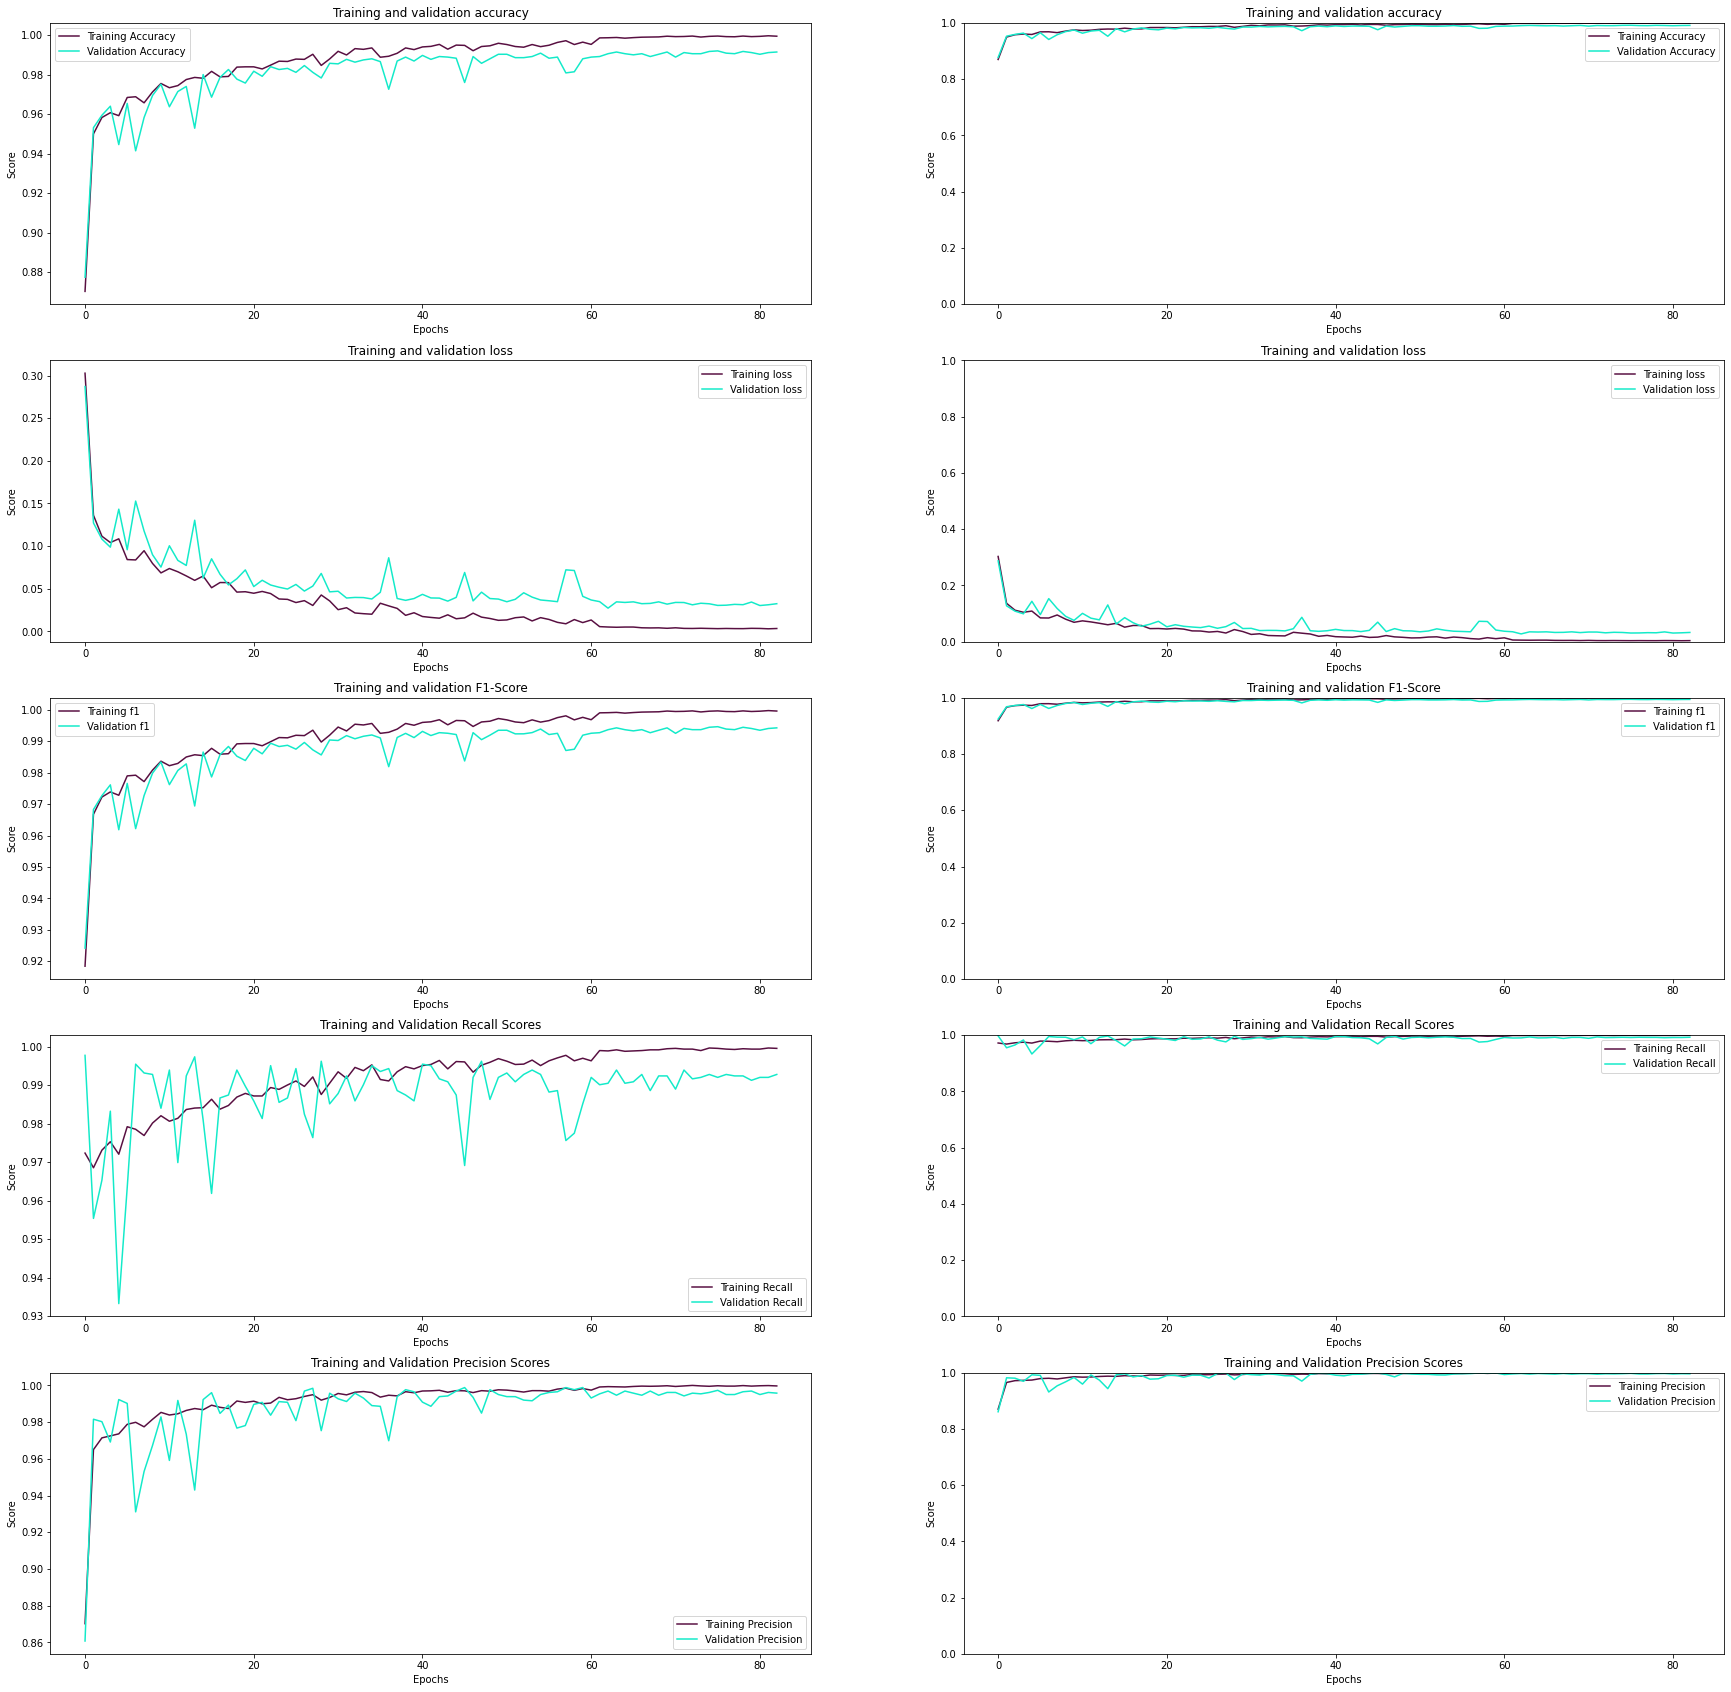

Test loss: 0.03196103125810623
Test accuracy: 0.9908571243286133
Test recall: 0.9908431768417358
Test precision: 0.9969289898872375


In [26]:
plot_performance(history3, model3)



# Model 3 Evaluation

In model 3 we can see the utility of the learning reduction adjustment. With the same layers and just the addition of early stopping and the learning rate reduction, we have increased our overall accuracy to %99.00. Our recall is now %99.08 and our precision has jumped to %99.43. 

# Models 4: Additional Maxpooling layers

In model 4, another pair of Conv2D and MaxPooling layers were added. I also increased the size of the first dense layer. I am making small incremental changes because there is not room for significant improvement at this stage.

In [27]:
model4 = Sequential([

        Conv2D(32, (3,3), activation = 'relu', padding = 'same', input_shape = input_shape),
        MaxPooling2D((2, 2)),
    
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(312, activation = 'relu'),
        Dense(1, activation='sigmoid')

]
)

model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 312)               1278264   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [28]:
model4.compile(loss = keras.losses.binary_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy', 'Recall', 'Precision'])
#Very cool early stopping and learning rate work
cp = [EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True), 
             ReduceLROnPlateau(patience=10, verbose=1)] 

In [29]:
history4 = model4.fit(train_generator,
                    epochs = 100,
                    verbose = 1,
                    callbacks = cp,
                    validation_data = val_generator,
                    
                   )

Epoch 1/100
110/110 [==============================] - 13s 108ms/step - loss: 0.2372 - accuracy: 0.8974 - recall: 0.9652 - precision: 0.9045 - val_loss: 0.1473 - val_accuracy: 0.9411 - val_recall: 0.9390 - val_precision: 0.9817
Epoch 2/100
110/110 [==============================] - 11s 101ms/step - loss: 0.1219 - accuracy: 0.9568 - recall: 0.9729 - precision: 0.9697 - val_loss: 0.1006 - val_accuracy: 0.9626 - val_recall: 0.9798 - val_precision: 0.9705
Epoch 3/100
110/110 [==============================] - 12s 104ms/step - loss: 0.1136 - accuracy: 0.9569 - recall: 0.9713 - precision: 0.9714 - val_loss: 0.1292 - val_accuracy: 0.9517 - val_recall: 0.9954 - val_precision: 0.9432
Epoch 4/100
110/110 [==============================] - 12s 107ms/step - loss: 0.0768 - accuracy: 0.9728 - recall: 0.9816 - precision: 0.9821 - val_loss: 0.0687 - val_accuracy: 0.9754 - val_recall: 0.9775 - val_precision: 0.9896
Epoch 5/100
110/110 [==============================] - 11s 101ms/step - loss: 0.0778 - a

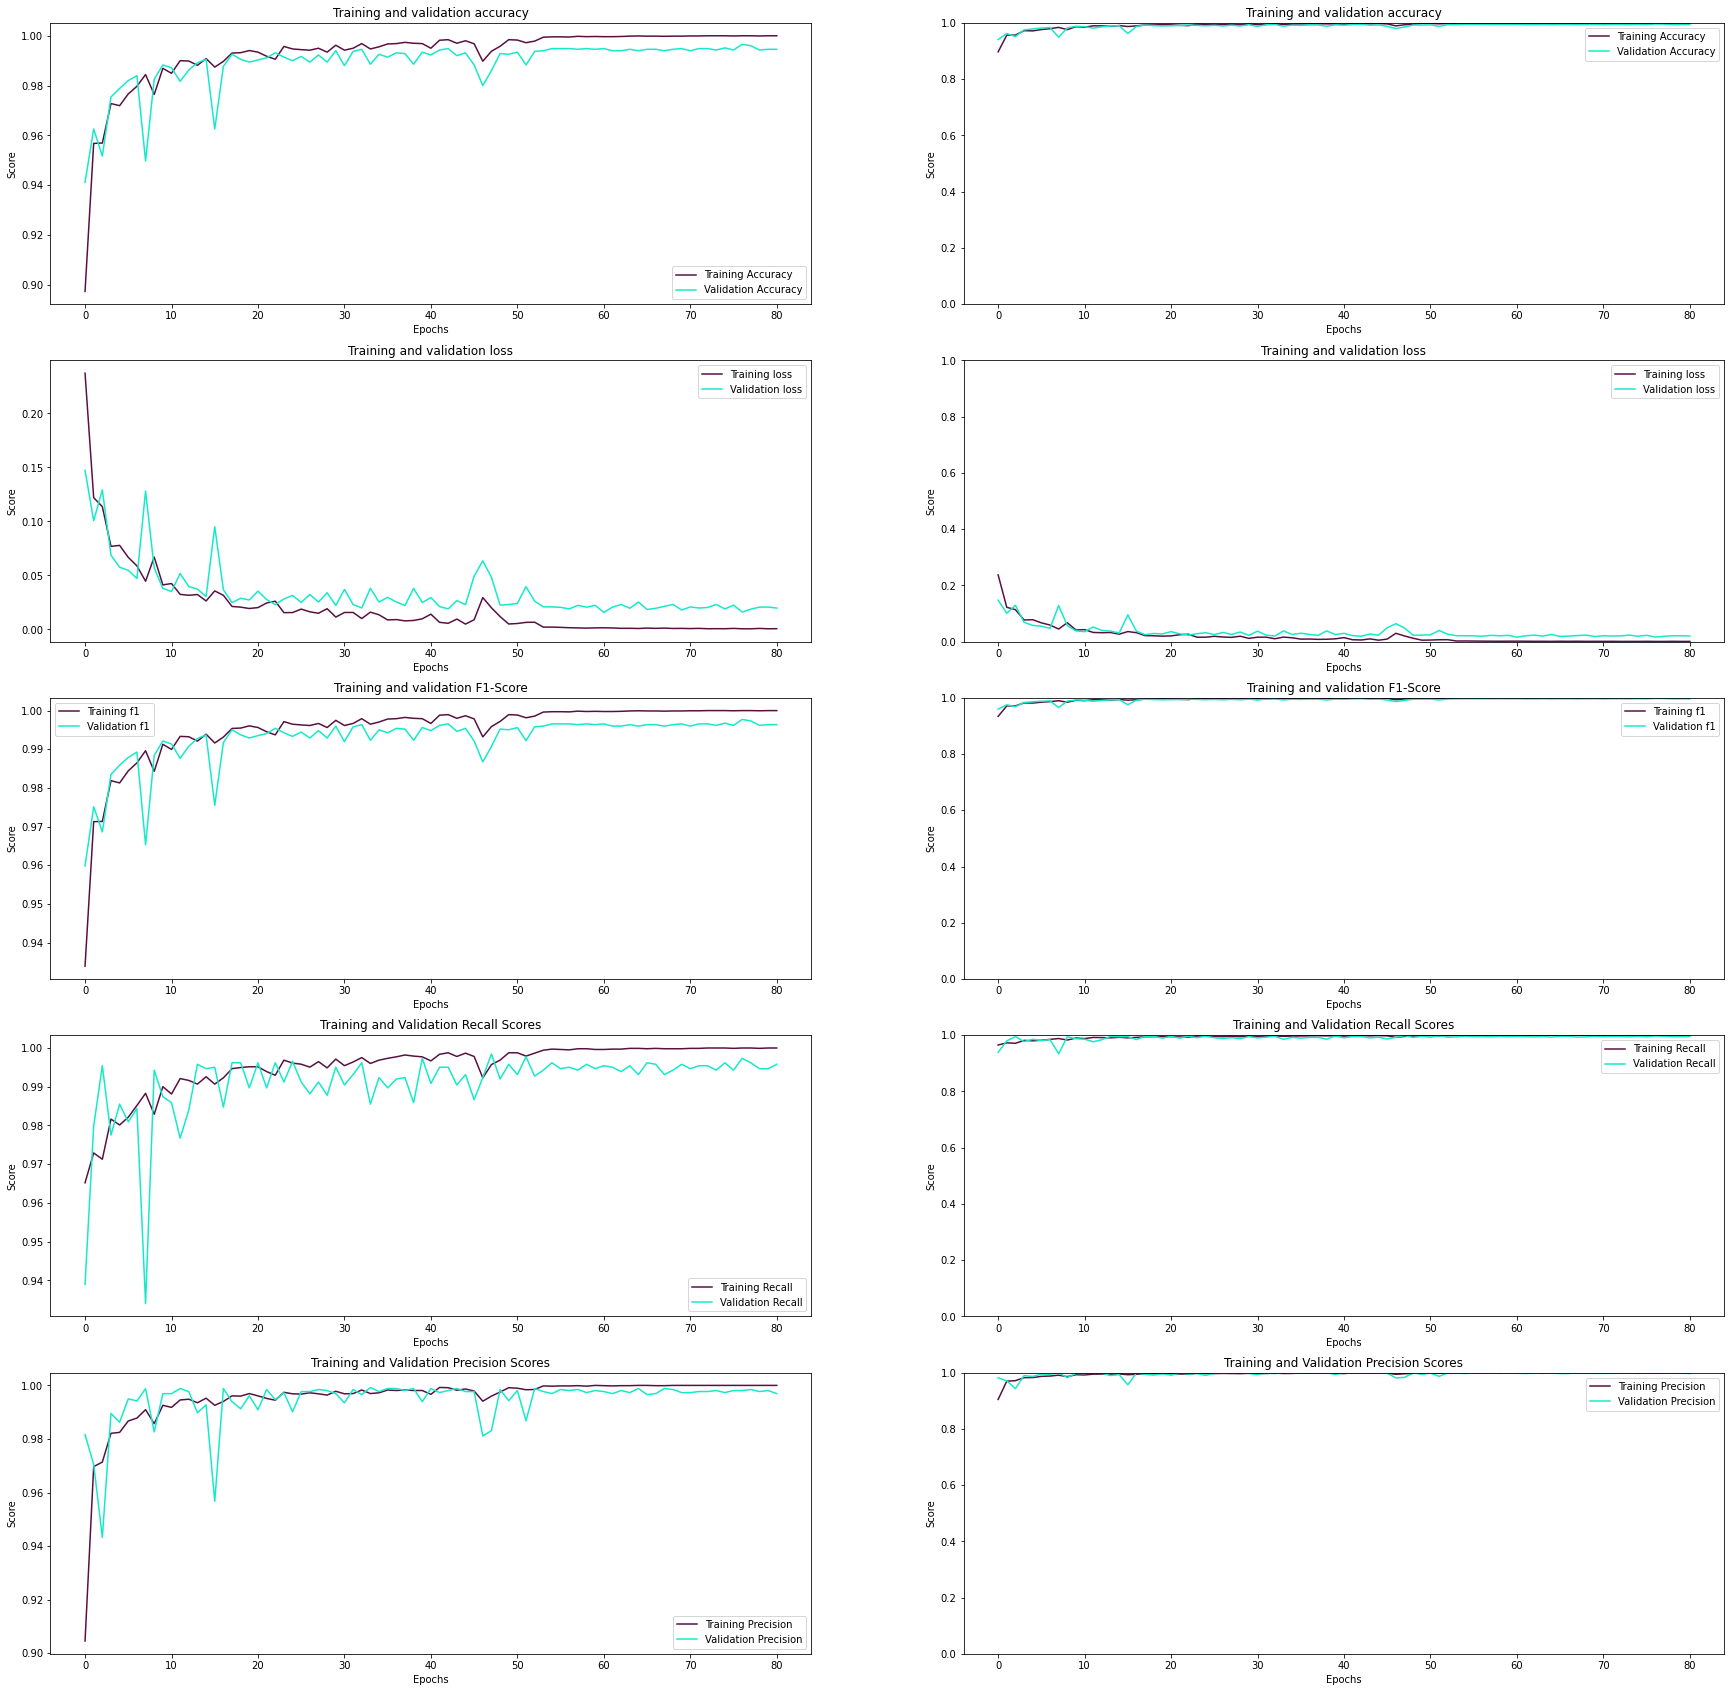

Test loss: 0.018312497064471245
Test accuracy: 0.994857132434845
Test recall: 0.9961846470832825
Test precision: 0.9969453811645508


In [30]:
plot_performance(history4, model4)

# Model 4 Evaluation

In Model 4 we continue to see improvements in every metric. At this point, this model is our best performing model. Model 4 has an accuracy of 99.69%, recall of 99.81%, and precision of 99.77%.

In Models 4, 5, and 6, additional convolutional and maxpooling layers were added. In each model I also increased the size of the first dense layer to see what effect it was having on overall performance. Models 4 and 5 can be found [here](https://www.kaggle.com/houleyemballo/total-models/edit). Each model showed slight improvement, but the most significant improvements were found in Models 4 and 6. Because of its simplicity, I finally chose to move forward with model 4. 

# Model 6: Adding Additional Layers

The inspiration for the majority of the layers in the final model was pulled from [this kaggle notebook](https://www.kaggle.com/jacobmorrison213/simple-cnn-using-keras). I was interested to compare this high performing model to my previous models.

In [31]:
model6 = Sequential([

    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
    
])

model6.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)        

In [32]:
model6.compile(loss = keras.losses.binary_crossentropy,
              optimizer = 'adam',
              metrics = ['accuracy', 'Recall', 'Precision'])

cp = [EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True),
             ReduceLROnPlateau(patience=10, verbose=1),

            ]

In [33]:
history6 = model6.fit(train_generator,
                    epochs = 100,
                    verbose = 1,
                    callbacks = cp,
                    validation_data = val_generator,
                    #class_weight = class_weights,
                   )

Epoch 1/100
110/110 [==============================] - 18s 150ms/step - loss: 0.2734 - accuracy: 0.8816 - recall: 0.9645 - precision: 0.8876 - val_loss: 0.1442 - val_accuracy: 0.9426 - val_recall: 0.9756 - val_precision: 0.9491
Epoch 2/100
110/110 [==============================] - 17s 151ms/step - loss: 0.1160 - accuracy: 0.9571 - recall: 0.9742 - precision: 0.9689 - val_loss: 0.1162 - val_accuracy: 0.9529 - val_recall: 0.9473 - val_precision: 0.9892
Epoch 3/100
110/110 [==============================] - 16s 148ms/step - loss: 0.0812 - accuracy: 0.9693 - recall: 0.9806 - precision: 0.9786 - val_loss: 0.0552 - val_accuracy: 0.9809 - val_recall: 0.9866 - val_precision: 0.9878
Epoch 4/100
110/110 [==============================] - 18s 167ms/step - loss: 0.0576 - accuracy: 0.9801 - recall: 0.9854 - precision: 0.9880 - val_loss: 0.0779 - val_accuracy: 0.9737 - val_recall: 0.9985 - val_precision: 0.9675
Epoch 5/100
110/110 [==============================] - 16s 144ms/step - loss: 0.0497 - a

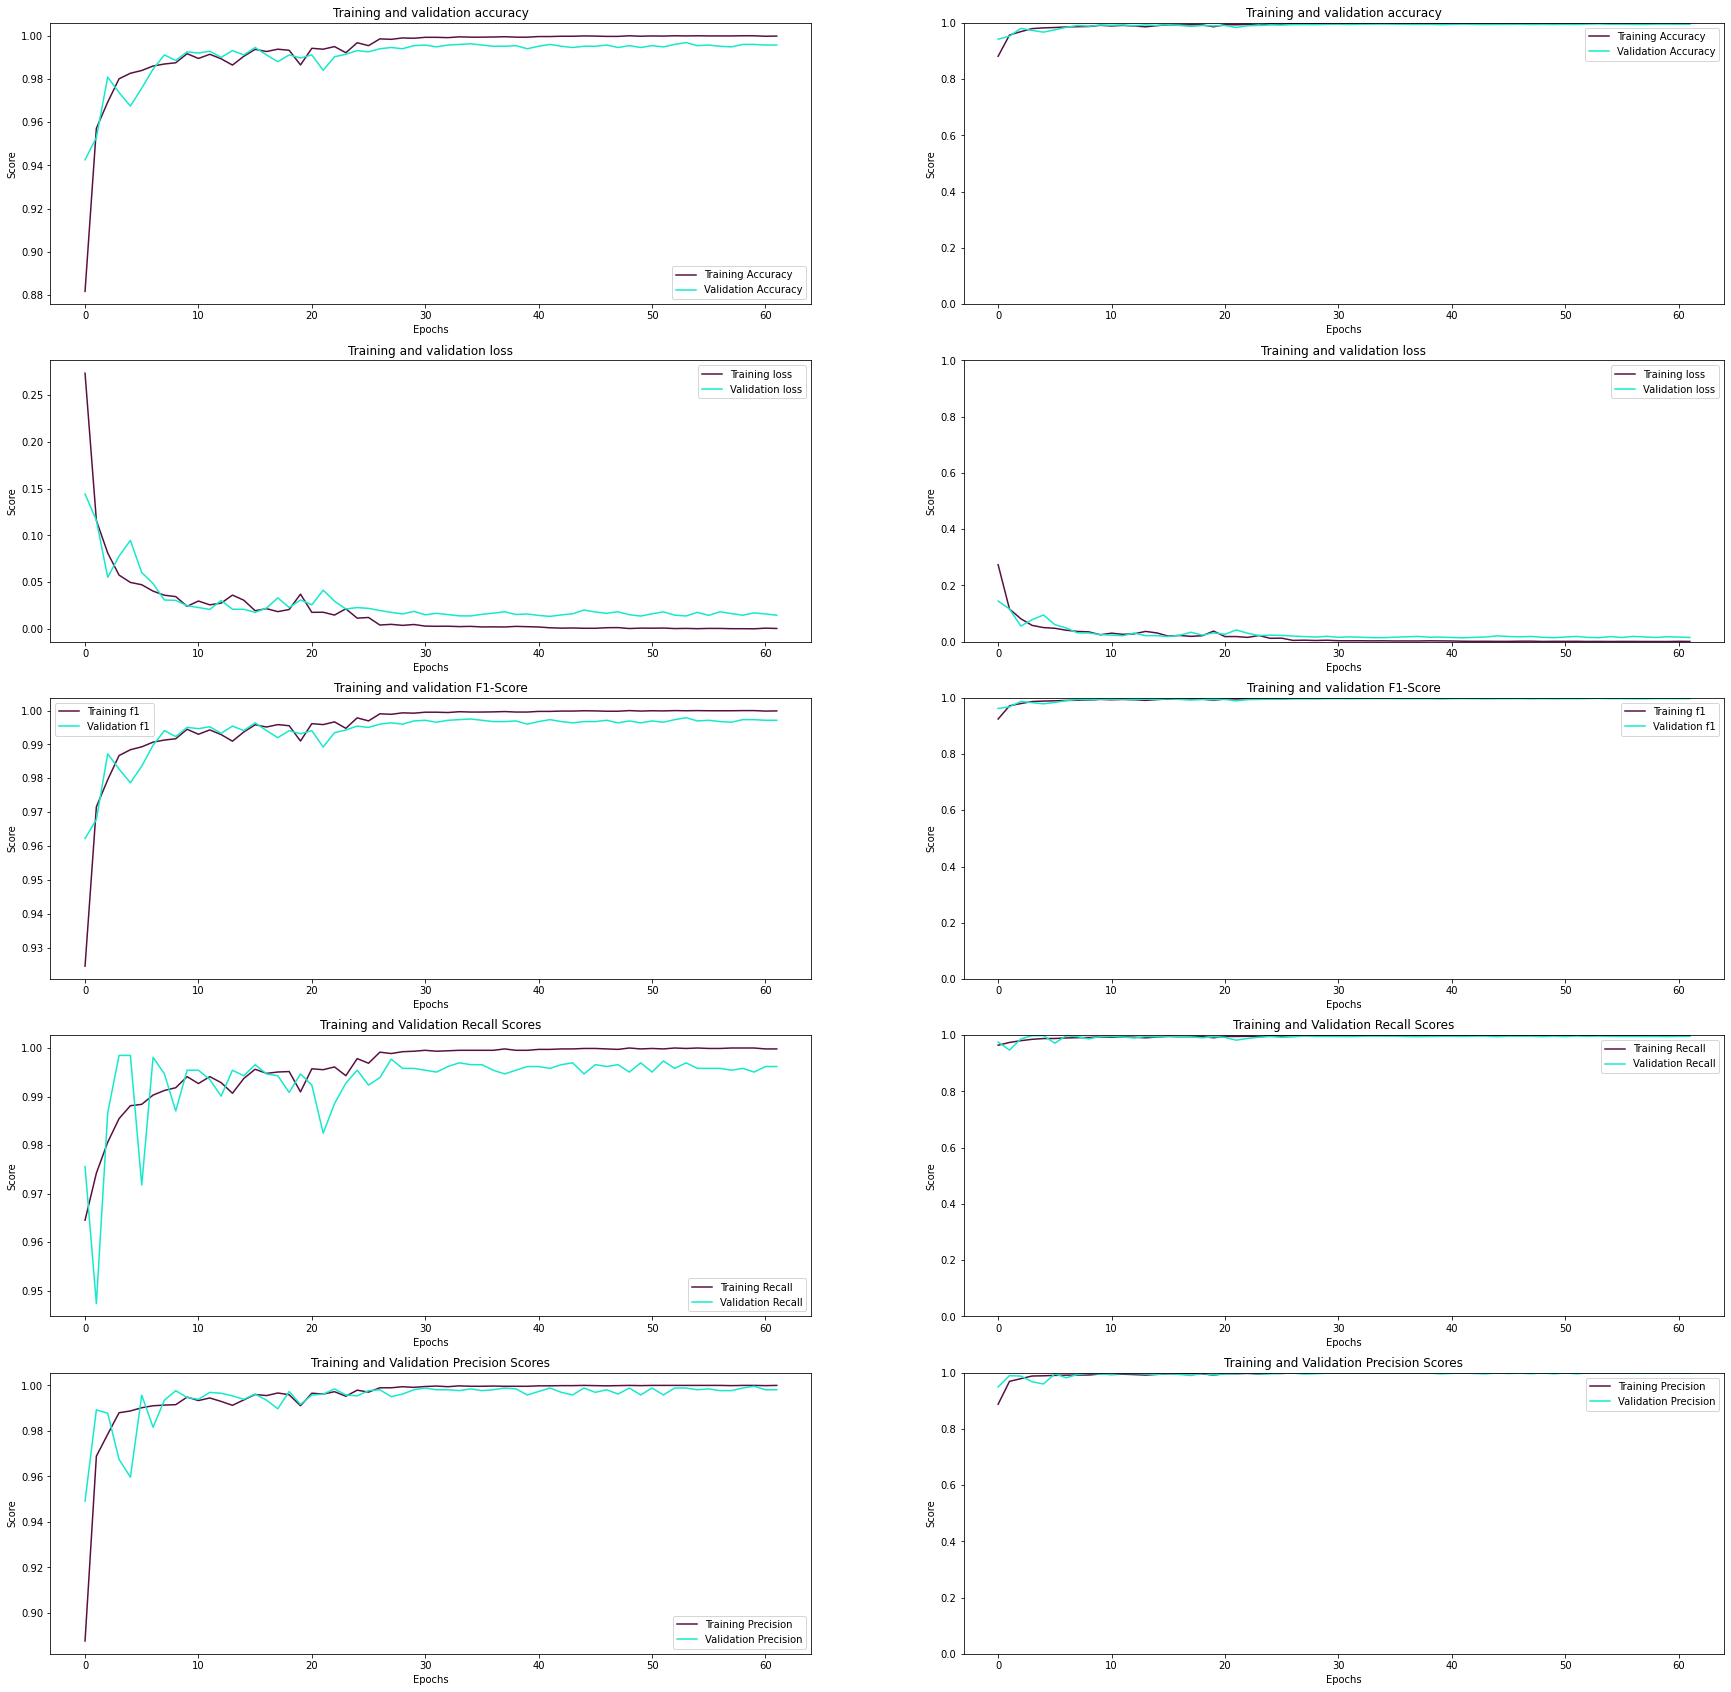

Test loss: 0.0176867488771677
Test accuracy: 0.9942857027053833
Test recall: 0.9942770004272461
Test precision: 0.9980850219726562


In [34]:

plot_performance(history6, model6)

# Model 6 Evaluation

Model 6 is performing almost as well as model 4, but it is slightly more complex. Because of this, it is best to move forward with the simplier model 4

# Evaluating Correct and Incorrect Predictions

This code was sourced from [an article](https://towardsdatascience.com/medical-x-ray-%EF%B8%8F-image-classification-using-convolutional-neural-network-9a6d33b1c2a) found on Towards Data Science.

In [35]:
preds = model6.predict(val_generator, verbose = 1)

28/28 [==============================] - 2s 59ms/step


In [36]:
test = val_generator

test.reset()
x=np.concatenate([test.next()[0] for i in range(test.__len__())])
y=np.concatenate([test.next()[1] for i in range(test.__len__())])
print(x.shape)
print(y.shape)

(3500, 32, 32, 3)
(3500,)


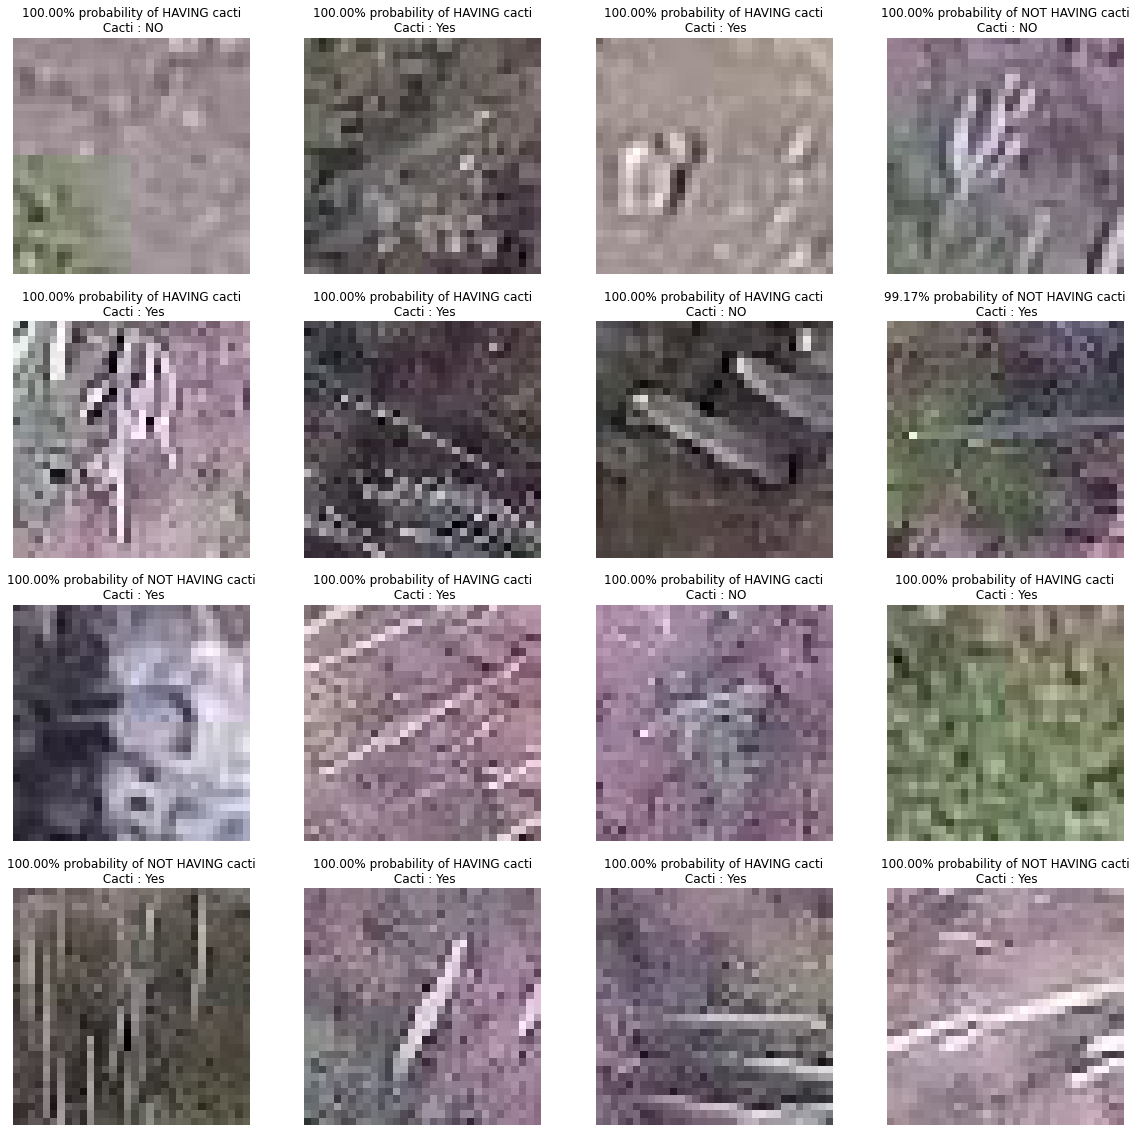

In [37]:
plot_model(model6,show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True)

dic = {0:'NO', 1:'Yes'}
plt.figure(figsize=(20,20))
for i in range(0+228, 16+228):
    
    plt.subplot(4, 4, (i-228)+1)
    if preds[i, 0] >= 0.5: 
        out = ('{:.2%} probability of HAVING cacti'.format(preds[i][0]))
    else: 
        out = ('{:.2%} probability of NOT HAVING cacti'.format(1-preds[i][0]))
    plt.title(out+"\n Cacti : "+ dic.get(y[i]))    
    plt.imshow(np.squeeze(x[i]))
    plt.axis('off')
plt.show()

From the breakdown of predictions above, we can see that the model is very confident when it is making predictions. There are no predictions being made below %98.00. There are a couple of instances of incorrect predictions and in each case, it is obvious why the model is making a mistake in the prediction. Because of the low resolution in the photos, features that have a lot in common with the shape of columnar cactus are being mistaken for them. With higher resolution images, this could be improved upon, but our final model only misclassified 21 photos out of 3500.

# Conclusion

The final model chosen as the best performing model is Model 4, a CNN with two Conv2D layers, two MaxPooling layers, a flattening layer, and two dense layers. Early stop and Learning Rate Reduction was also used. 

The final performance metric scores were 99.69% accuracy, 99.81% recall, and 99.77% precision.

My final model performs very well on unseen data and I am highly confident that my model would be well utilized on further unseen images. It would be an effective tool for the Mexican Government to begin their environmental site assessments using drones. I have iterated through many different models and I have also tried out a pre-trained Resnet model. The final model was chosen because it is simple, and also offers the highest performance. It is a good example of why added complexity does not always yield better results. 

While the results are good, they are not perfect. I do believe with further work it would be possible to have the model performing with 100% accuracy and %100 precision. I would like to move forward with a different type of activation layer to assess improvements. Pulling in other pre-trained models would also show if other types of pre-trained models show improvements that Resnet does not. 

Overall, a precision score of %99.77 and an overall accuracy of  means that we can identify areas that do not have our keystone species with confidence.

# Application of the Model

Our model can be used for a wide variety of functions. First, it will be a large asset in resource prioritization. The care takers of the valley can perform drone flights over the entirety of the valley much faster than researchers could walk the space. The resulting images would be consistent, and areas lacking cacti can accurately be identified, helping pinpoint spaces for restoration work. This will cut down on any time wasted searching for new sites to amend. The use of a drone also helps monitor hard to reach areas. Finally, the use of a drone for monitoring is one of the least invasive ways to monitor natural areas. It reduces the need for automotive traffic and foot traffic through the region. This also helps with safety as researchers will not have to spend large amounts of time in remote areas in the field. 

# Next Steps

### Species classification expansion 

Moving forward, we would like to expand our model to recognize and classify other critical plant and animal species in the region. This would allow the model to give a complete ecological health account of the region. In the Tehuacán-Cuicatlán region, 70% of worldwide flora communities are represented with over 3,000 species of vascular plants of which %10 are endemic to the valley. By adding more species to our classification model, we can offer frequent drone flights to monitor the presence of more critical species in the area. Other species of critical import can be prioritized. There are 38 threatened species endemic to the region that could potentially be prioritized in further modeling. 


### Species Count 

To make the model more robust, adding in the capacity to estimate the number of target species present in an image would help with any environmental site assessment. While it is useful to identify pieces of land with cacti present, it would be more useful to know the amount in an area. As our model stands now, a piece of land with a single cactus would be classified in the same category as a piece of land with 1500 cacti present. Adding the capacity for count would allow us to further prioritize land in need of remediation efforts. 

### Specific Human Impact Assessment 

Right now, our model is looking for the lack of certain critical plant species to evaluate the consequences of human impact. A better solution would be to train a model to specifically look for the hallmarks of negative human activity in sensitive areas like evidence of logging, mining, or agriculture. In images that are classified as having no cactus present, it would be useful to further classify them into human impact categories. 

# Research Citations

- https://www.sciencedirect.com/science/article/abs/pii/S1574954119300895?via%3Dihub
- https://jivg.org/research-projects/vigia/
- https://www.researchgate.net/publication/237166397_Biotic_interactions_and_the_population_dynamics_of_the_long-lived_columnar_cactus_Neobuxbaumia_tetetzo_in_the_Tehuacan_Valley_Mexico
- https://www.jstor.org/stable/3235892
- https://www.nationalgeographic.org/encyclopedia/keystone-species/
- https://whc.unesco.org/en/list/1534
